0. Preparation (Setting the Random State)

In [1]:
import numpy as np
import scipy as sc
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn


rs = min(328964, 328830)
np.random.seed(rs) # you have to call in every cell where you use a function that requires a random state


1. Exercise 1 (Loading and Preparing the Data)

In [2]:
np.random.seed(rs)

df_tot = pd.read_csv("cla4lsp_customers.csv", sep='\t', parse_dates=['Dt_Customer'], date_format='%d-%m-%Y')
print(df_tot.info())
workdf = df_tot.sample(frac=2/3, random_state=rs)
print(df_tot.shape)
print(workdf.shape)
workdf.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)
print(workdf.shape)
labels = ['NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
          'Response', 'Complain', 'Recency']
features = list(workdf.drop(labels, axis=1).columns)
print(labels)
print(features)
habits = features[7:16]
print(habits)
removed = np.random.choice(habits, 1)
print(removed)
workdf.drop(removed, axis=1, inplace=True)
features.remove(removed)
print(workdf.shape)
print(features)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

Cleaning the working dataset from missing values

In [3]:
print(workdf[features].isna().sum())
workdf['Income'].fillna(0, inplace=True)

Year_Birth              0
Education               0
Marital_Status          0
Income                 15
Kidhome                 0
Teenhome                0
Dt_Customer             0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntGoldProds            0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
dtype: int64


2. Exercise 2 (Encoding of Categorical Data) \
Here we have only two categorical features: Education and Marital_Status; since there are not too many possible values, we can use one-hot encoding by means of the pd.get_dummies() function.

In [4]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


# enc = OneHotEncoder()
# transformed = enc.fit_transform(workdf[['Education', 'Marital_Status']])
# print(transformed)
# ohe_df = pd.DataFrame(transformed, columns=[['Education', 'Marital_Status']])
# Xworkdf = pd.concat([workdf, ohe_df], axis=1).drop(['Education', 'Marital_Status'], axis=1)

# print(workdf[features].iloc[:5])
Xworkdf = pd.get_dummies(data=workdf[features], columns=['Education', 'Marital_Status'], drop_first=True)
new_cols = list(Xworkdf.columns[~Xworkdf.columns.isin(workdf.columns)])
print(new_cols)
years = Xworkdf['Year_Birth']
dates = Xworkdf['Dt_Customer']
le = LabelEncoder()
enc_years = le.fit_transform(years)
enc_dates = le.fit_transform(dates)
Xworkdf['Year_Birth'] = enc_years
Xworkdf['Dt_Customer'] = enc_dates
# print(Xworkdf.shape)
# print(Xworkdf.iloc[:5])



['Education_Basic', 'Education_Graduation', 'Education_Master', 'Education_PhD', 'Marital_Status_Alone', 'Marital_Status_Divorced', 'Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_Together', 'Marital_Status_Widow', 'Marital_Status_YOLO']


 Exercise 3 (Preprocessing and full-PCA)

In [40]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
var_original = Xworkdf.var()
std_features = std.fit_transform(Xworkdf.values)
Xworkdf_std = pd.DataFrame(std_features, index=Xworkdf.index, columns=Xworkdf.columns)
var_std = Xworkdf_std.var()
change_std = ((var_std - var_original) / var_original) * 100
print("\nPercentage Change in Variance with StandardScaler:")
print(change_std)


Percentage Change in Variance with StandardScaler:
Year_Birth                   -99.273576
Income                      -100.000000
Kidhome                      248.008325
Teenhome                     235.620289
Dt_Customer                  -99.996710
MntWines                     -99.999143
MntFruits                    -99.935989
MntMeatProducts              -99.998011
MntFishProducts              -99.965005
MntGoldProds                 -99.963248
NumWebPurchases              -86.627052
NumCatalogPurchases          -88.349346
NumStorePurchases            -90.583662
NumWebVisitsMonth            -83.233622
Education_Basic             3830.887384
Education_Graduation         300.467291
Education_Master             599.572859
Education_PhD                467.430606
Marital_Status_Alone       49766.868009
Marital_Status_Divorced      987.234904
Marital_Status_Married       319.897110
Marital_Status_Single        496.560685
Marital_Status_Together      428.874890
Marital_Status_Widow        

In [30]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler(feature_range=(0, 1))
mm_features = mm.fit_transform(Xworkdf.values)
Xworkdf_mm = pd.DataFrame(mm_features, index=Xworkdf.index, columns=Xworkdf.columns)
var_mm = Xworkdf_mm.var()
change_mm = ((var_mm - var_original) / var_original) * 100
print("\nPercentage Change in Variance with MinMaxScaler:")
print(change_mm)


Percentage Change in Variance with MinMaxScaler:
Year_Birth                 -99.968112
Income                    -100.000000
Kidhome                    -75.000000
Teenhome                   -75.000000
Dt_Customer                -99.999721
MntWines                   -99.999955
MntFruits                  -99.997475
MntMeatProducts            -99.999966
MntFishProducts            -99.998498
MntGoldProds               -99.999030
NumWebPurchases            -99.840000
NumCatalogPurchases        -99.872449
NumStorePurchases          -99.408284
NumWebVisitsMonth          -99.750000
Education_Basic              0.000000
Education_Graduation         0.000000
Education_Master             0.000000
Education_PhD                0.000000
Marital_Status_Alone         0.000000
Marital_Status_Divorced      0.000000
Marital_Status_Married       0.000000
Marital_Status_Single        0.000000
Marital_Status_Together      0.000000
Marital_Status_Widow         0.000000
Marital_Status_YOLO          0.000000


Comment

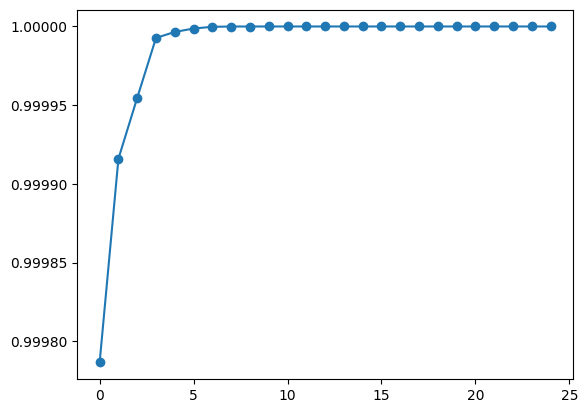

In [66]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit_transform(Xworkdf)
eigenvalues = pca.explained_variance_
explained_variances = eigenvalues / np.sum(eigenvalues)
explained_variance_ratio = np.cumsum(explained_variances)
plt.plot(explained_variance_ratio, marker='o')
#plt.plot(explained_variances, marker='o')
plt.show()

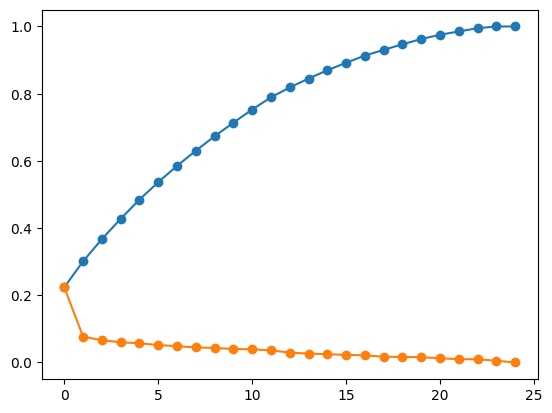

In [62]:
pca_std=PCA()
pca_std.fit_transform(Xworkdf_std)
eigenvalues = pca_std.explained_variance_
explained_variances = eigenvalues / np.sum(eigenvalues)
explained_variance_ratio = np.cumsum(explained_variances)
plt.plot(explained_variance_ratio, marker='o') #cum
plt.plot(explained_variances, marker='o') #individual
plt.show()

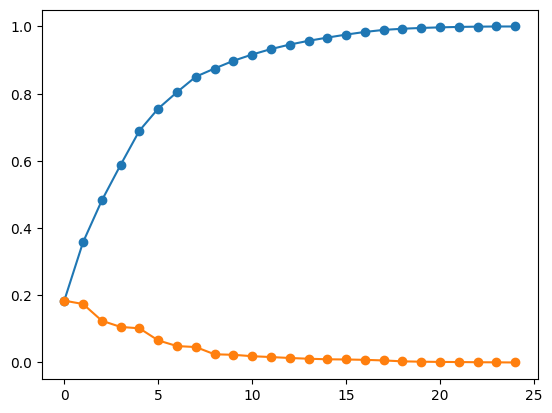

In [63]:
pca_mm=PCA()
pca_mm.fit_transform(Xworkdf_mm)
eigenvalues = pca_mm.explained_variance_
explained_variances = eigenvalues / np.sum(eigenvalues)
explained_variance_ratio = np.cumsum(explained_variances)
plt.plot(explained_variance_ratio, marker='o') #cum
plt.plot(explained_variances, marker='o') #individual
plt.show()